In [1]:
#import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
Respondent=pd.read_csv("ATUS_Survey/atusresp.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"])  #Initialize all dataframes and store number of people as variable
Roster=pd.read_csv("ATUS_Survey/atusrost.csv")

In [2]:
#Record age, day of week, and stat weight data from Respondent and Roster files

import math

cols=["DayOfWeek","Sleep","Weight","Age"]

#keys from "tucaseid
DOWDict={}  #tudiaryday--frum Respondent
WeightDict={}  #tufnwgtp--from Respondent
AgeDict={}  #teage--from Roster

for ind,row in Roster.iterrows():
    if (row["tulineno"]==1):
        AgeDict[row["tucaseid"]]=row["teage"]

for ind, row in Respondent.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True):
        DOWDict[row["tucaseid"]]=row["tudiaryday"]
        WeightDict[row["tucaseid"]]=row['tufnwgtp']

In [4]:
import numpy as np
sleepinds=(Activities["trcodep"]==10101) | (Activities["trcodep"]==10199)
print(np.sum(sleepinds))

365548


In [6]:
def Hour_Decimal(time):
    L=time.split(":")
    return int(L[0])+int(L[1])/60 +int(L[2])/3600

In [15]:
times=np.arange(0,24+1/2,1/2)
SleepCounts=np.zeros(len(times))
Sample=len(Activities)
for ind,row in Activities[sleepinds].head(Sample).iterrows():
    ID=row["tucaseid"]
    S=Hour_Decimal(row["tustarttim"])
    E=Hour_Decimal(row["tustoptime"])
    if S<4 and E>4: #Make sure people don't have >24 hr logged
        E=3.99
    #index=(times>=S) & (times<=E)
    for ind,counts in enumerate(SleepCounts):
        if S<E and (times[ind]>=S and times[ind]<=E):
            SleepCounts[ind]+=WeightDict[ID]
        else:
            if S>E and (times[ind]>=S or (times[ind]<=E and times[ind]<4)):
                SleepCounts[ind]+=WeightDict[ID]

Max % = 95.6694453258 @ [ 3.]
Min % = 2.89339611551 @ [ 18.5]
[  7.2    7.21   7.22 ...,  22.45  22.46  22.47]


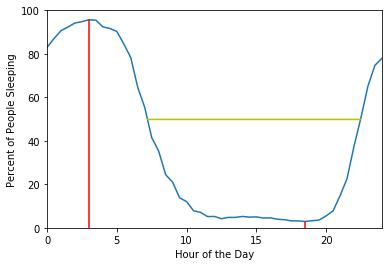

In [58]:
import matplotlib.pyplot as plt
NSample=sum(WeightDict.values())
NSleepCounts=[x/NSample*100 for x in SleepCounts]

plt.plot(times,NSleepCounts)
plt.xlabel('Hour of the Day')
plt.ylabel('Percent of People Sleeping')


NP=np.array(NSleepCounts)
inds=NP==max(NP)
Tinds=times[inds]
plt.plot([Tinds,Tinds],[0, max(NP)],'r')

print('Max % = '+str(max(NP)) + ' @ ' + str(Tinds))

inds=NP==min(NP)
Tinds=times[inds]
plt.plot([Tinds,Tinds],[0, min(NP)],'r')

print('Min % = '+str(min(NP)) + ' @ ' + str(Tinds))

plt.ylim([0,100])
plt.xlim([0,24])


xq=np.arange(0,24,.01)
Idata=np.interp(xq,times,NP)
#plt.plot(xq,Idata)
inds=Idata<=50
Tinds=xq[inds]
Ninds=Idata[inds]
plt.plot([min(Tinds),max(Tinds)],[Ninds[0], Ninds[len(Ninds)-1]],'y')
print(Tinds)



plt.savefig("SleepVsTime.png")

In [74]:
def AgeInd(age,Ages):
    for ind,a in enumerate(Ages):
        if age>a and (ind==len(Ages)-1 or age<=Ages[ind+1]):
            return ind

In [101]:
times=np.arange(0,24+1/2,1/2)
Ages=np.arange(11,90,15)
SleepCounts=np.zeros((len(Ages),len(times)))
WSum=np.zeros(len(Ages))
for ID in AgeDict.keys():
    W=WeightDict[ID]
    Age=AgeDict[ID]
    AI=AgeInd(Age,Ages)
    WSum[AI]+=W
    
Sample=len(Activities)

for ind,row in Activities[sleepinds].head(Sample).iterrows():
    ID=row["tucaseid"]
    W=WeightDict[ID]
    Age=AgeDict[ID]
    AI=AgeInd(Age,Ages)
    S=Hour_Decimal(row["tustarttim"])
    E=Hour_Decimal(row["tustoptime"])
    if S<4 and E>4: #Make sure people don't have >24 hr logged
        E=3.99
    #index=(times>=S) & (times<=E)
    for ind,counts in enumerate(SleepCounts[AI,:]):
        if S<E and (times[ind]>=S and times[ind]<=E):
            SleepCounts[AI,ind]+=W
        else:
            if S>E and (times[ind]>=S or (times[ind]<=E and times[ind]<4)):
                SleepCounts[AI,ind]+=W

In [102]:
Ages=np.arange(11,90,15)
print(Ages)
Age=15
print(AgeInd(Age,Ages))

[11 26 41 56 71 86]
0


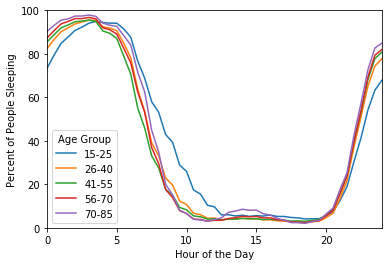

In [106]:
for ind,i in enumerate(Ages):
    if ind!=len(Ages)-1:
        NSample=WSum[ind]
        NSleepCounts=[x/NSample*100 for x in SleepCounts[ind,:]]
        plt.plot(times,NSleepCounts)
    
plt.xlabel('Hour of the Day')
plt.ylabel('Percent of People Sleeping')



L=['15-25','26-40','41-55','56-70','70-85']
for a in Ages:
    L.append(str(a))
plt.legend(L,title='Age Group')

plt.ylim([0,100])
plt.xlim([0,24])

plt.savefig("SleepVsTimeVsAge.png")

In [93]:
max(SleepCounts[1,:])/WSum[1]


0.44751945713923547

In [94]:
WSum

array([  2.53082853e+11,   4.11721733e+11,   3.99544889e+11,
         4.25368077e+11,   3.88971560e+11,   2.68949811e+11,
         2.32604533e+11,   3.34585770e+10])